# Initial Planetesimal Disk Conditions
Here I calculate what a reasonable planetesimal disk surface density. Basically, a planetesimal disk that contains a i) high enough surface density, ii) large enough protoplanetary seed and/or iii) low enough velocity dispersion will start to form planets. Thus, if we want to prevent a planet from forming in our planetesimal disk, we need to constrain these parameters using Eq. 5.34 (p.159) from Armitage (2010):
$$\frac{dM}{dt} = \frac{\sqrt{3}\pi G \Sigma_p \Omega}{\sigma_v^2}MR_s $$
where:  
$G$ is the gravitational constant.  
$\Sigma_p = \Sigma_0(a/1 \rm{AU})^{\alpha}$ is the surface density of the planetesimal disk ($a$ is the semi-major axis, $\Sigma_0$ is a g/cm$^2$ constant).  
$\Omega = v_{k}/2\pi a$ is the keplerian angular frequency ($v_{k}$ is the Keplerian velocity).  
$M$ is the mass of the protoplanet.  
$R_s \approx \left(\frac{M}{(4/3)\pi \rho}\right)^{1/3}$ is the summed radii of the colliding bodies ($\rho$ is the planetesimal desity).  
$\sigma_v = (5/4e^2 + i^2)^{1/2}v_{k}$ is the velocity dispersion of the protoplanet relative to other planetesimals (Armitage, 2010, Eq. 5.24).  

The above equation assumes a dispersion dominated regime where two body interactions dominate the physics.

### Motivation
The question in particular that I am asking is, if I do **not** want a planet to form in my planetesimal disk within $T$ years, for a given $\Omega$, $M$, etc. what is the maximum possible surface density? Here I am assuming that the planet that I want to avoid forming is roughly Mercury sized, and using a relatively generous timescale of $\sim 10^5$ orbital periods.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
#calculates the max Sigma_0 for the given set of parameters.
def max_Sigma(a,alpha,e,rho,M,dMdt):
    gcm2_to_MsunAU2 = 1./((6.68459e-14)**2 * 2e33)
    gcm3_to_MsunAU3 = gcm2_to_MsunAU2 / (6.68459e-14)
    Sigma_0MMSN = 1700
    
    rho *= gcm3_to_MsunAU3 * 4*np.pi/3
    vk = a**(-0.5)                                              #G and M_* = 1
    sigmav2 = (e**2 + (e/4)**2)*vk**2
    Omega = vk/(2*np.pi*a)
    
    #If working in units of orbital periods
    #const = 3**0.5 * np.pi**2 * 2
    #Sigma = dMdP*sigmav2*rho**(1./3.)/(const*Omega*M**(4./3.)*a**(3/2))  #Sigma = Sigma_0*(a/1AU)^alpha

    const = 3**0.5 * np.pi
    Sigma = dMdt*sigmav2*rho**(1./3.)/(const*Omega*M**(4./3.)) 
    
    Sigma_0 = Sigma/a**(alpha)
    return Sigma_0/(gcm2_to_MsunAU2 * Sigma_0MMSN)              #convert to Sigma_0/Sigma_MMSN

#reverses the argument, calculating the max protoplanet mass for a given Sigma
def max_mass(a,alpha,Sigma0,e,rho,dMdP):
    gcm2_to_MsunAU2 = 1./((6.68459e-14)**2 * 2e33)
    gcm3_to_MsunAU3 = gcm2_to_MsunAU2 / (6.68459e-14)
    dMdt = dMdP*2*np.pi*a**(1.5)
    
    rho *= gcm3_to_MsunAU3 * 4*np.pi/3
    Sigma0 *= gcm2_to_MsunAU2
    vk = a**(-0.5)                                              #G and M_* = 1
    sigmav2 = (e**2 + (e/4)**2)*vk**2
    Omega = vk/(2*np.pi*a)
    Sigma = Sigma0*a**(alpha)
    const = 3**0.5 * np.pi
    return (dMdt*sigmav2*rho**(1./3.) / (const*Sigma*Omega))**(0.75)  #max protoplanet mass

In [228]:
#surface density evolution
a = 0.1
alpha = 0
Sigma_0 = 1700             #(Sigma_MMSN = 1700, g/cm^2) 

#Mass of each planetesimal
M = 3.7e-8                 #Moon = 3.7e-8 

#velocity dispersion
e = 0.01                   #assume <e>^0.5 = 2<i>^0.5

#planetesimal rock density
rho = 3                    #units in grams/cm^3, converted later to M_sun/AU^3

#maximum growth rate - i.e. what protoplanet mass do I need so that M_final wouldn't form in T years?
M_final = 1.64e-7          #Mercury = 1.64e-7, Earth = 3e-6
T = 1e5*(2*np.pi)            #minimum time to form planet (yr/2pi)
dMdt = M_final/T   

In [229]:
#For given parameters above, what is the max surface density allowed (Sigma_0/Sigma_MMSN units)
max_Sigma(a,alpha,e,rho,M,dMdt)

0.11919072458560193

In [230]:
#For given parameters above, what is the max protoplanet mass allowed (M_sun units)?
protoplanet_mass = max_mass(a,alpha,Sigma0,e,rho,dMdt)
protoplanet_mass

2.2336672174145914e-09

### Sensitivity tests
See how things change when altering the above parameters

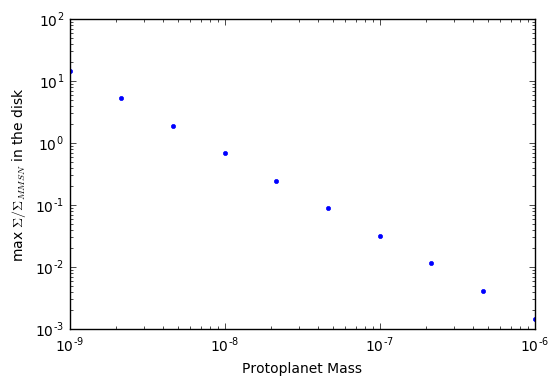

In [236]:
param = np.logspace(-9,-6,10)   #protoplanet mass
plt.plot(param, max_Sigma(a,alpha,e,rho,param,dMdt), '.')
plt.xlabel(r'Protoplanet Mass')
plt.ylabel(r'max $\Sigma/ \Sigma_{MMSN}$ in the disk')
plt.xscale('log')
plt.yscale('log')

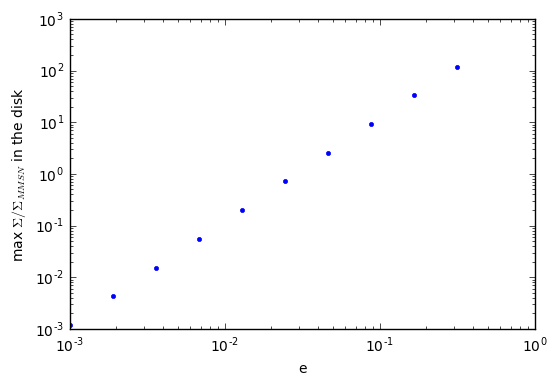

In [233]:
param = np.logspace(-3,-0.5,10)
plt.plot(param, max_Sigma(a,alpha,param,rho,M,dMdt), '.')
plt.xlabel('e')
plt.ylabel(r'max $\Sigma/ \Sigma_{MMSN}$ in the disk')
plt.yscale('log')
plt.xscale('log')

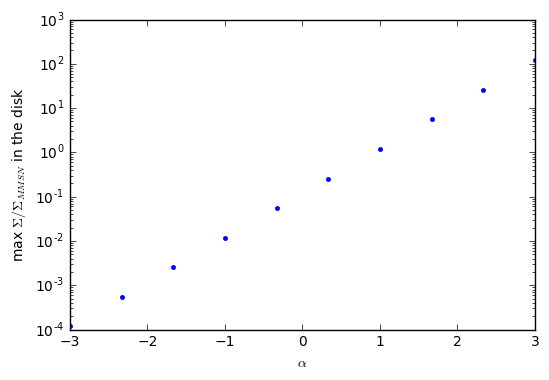

In [234]:
param = np.linspace(-3,3,10)    #alpha
plt.plot(param, max_Sigma(a,param,e,rho,M,dMdt), '.')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'max $\Sigma/ \Sigma_{MMSN}$ in the disk')
plt.yscale('log')

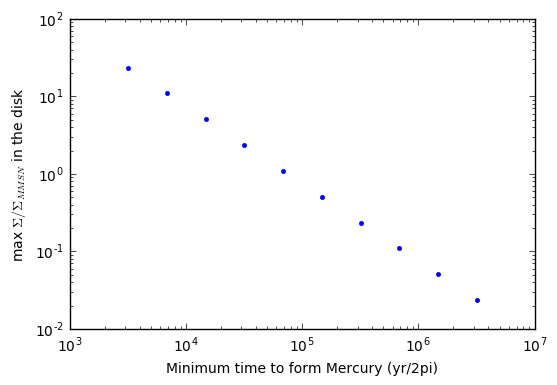

In [235]:
param = M_final/(np.logspace(4,7,10))*np.pi               #dMdt
plt.plot(M_final/param, max_Sigma(a,param,e,rho,M,param), '.')
plt.xlabel(r'Minimum time to form Mercury (yr/2pi)')
plt.ylabel(r'max $\Sigma/ \Sigma_{MMSN}$ in the disk')
plt.yscale('log')
plt.xscale('log')